In [2]:
import pandas as pd
import numpy as np
import MATTE
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
print(MATTE.__version__)
print(sklearn.__version__)

1.2.1
1.0.2


In [3]:
# read data.
df = pd.read_table("./BRCA_tpm_unstranded.tsv",index_col=0)
df.index = [i.split(".")[0] for i in df.index]
samples = df.columns
df_pheno = pd.DataFrame(index=samples,columns=["sample_id","sample_type"])
for i in range(df_pheno.shape[0]):
    df_pheno.iloc[i,:] = [samples[i][0:12],samples[i][-3:]]
df_pheno = df_pheno[(df_pheno["sample_type"]=="01A")|(df_pheno["sample_type"]=="11A")]["sample_type"]

samples = df.columns.intersection(df_pheno.index)
df = df.loc[:,samples]
df_pheno = df_pheno.loc[samples]

# Running MATTE

## CORR

In [3]:
pipeline = MATTE.AlignPipe(target='cluster',stats_type='corr')
#pipeline.funcs = pipeline.funcs[3:] # delete preprocessing steps.
#pipeline.funcs[4].add_params(kernel_type='corr',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)
pipeline.cluster_func[0].add_params(dist_type='e')
pipeline

MATTE calculation pipeline
## STEP 0 	<PipeFunc> inputs_check()
## STEP 1 	<PipeFunc> RPKM2TPM()
## STEP 2 	<PipeFunc> log2transform()
## STEP 3 	<PipeFunc> expr_filter(gene_filter=None)
## STEP 4 	<PipeFunc> CorrKernel_Transform(n_components=16)
## CLUSTER STEP 0 	<PipeFunc> CrossCluster(preset='kmeans',n_clusters=8,method='a',dist_type='e',n_iters=20)
## CLUSTER STEP 1 	<PipeFunc> build_results()

### n_clusters finding

In [4]:
tmpt = pipeline._AlignPipe__cal_temp(df_exp=df[~df.index.duplicated()],df_pheno=df_pheno)

Fri May 13 13:30:30 2022	 Running function <PipeFunc> inputs_check()
Fri May 13 13:30:30 2022	 Running function <PipeFunc> RPKM2TPM()
Fri May 13 13:31:06 2022	 Running function <PipeFunc> log2transform()
Fri May 13 13:31:07 2022	 Running function <PipeFunc> expr_filter(gene_filter=None)
Fri May 13 13:31:08 2022	 Running function <PipeFunc> CorrKernel_Transform(n_components=16)


In [9]:
# search best cluster
from tqdm import tqdm
res = {}
for n in tqdm([4,6,8,10,12,14,18,24]):
    tmpt['cluster_properties'] = {}
    pipeline.cluster_func[0].add_params(n_clusters=n)
    res[n] = pipeline.calculate_from_temp(tmpt_result=tmpt,verbose=False)
    print(res[n].cluster_properties['score'])


  0%|          | 0/8 [00:00<?, ?it/s]

Sat May 14 08:31:43 2022	 building cluster results



 12%|█▎        | 1/8 [00:36<04:17, 36.80s/it]

2314.8682866365975
Sat May 14 08:32:29 2022	 building cluster results



 25%|██▌       | 2/8 [01:25<04:23, 43.96s/it]

2195.562604774036
Sat May 14 08:33:18 2022	 building cluster results



 38%|███▊      | 3/8 [02:16<03:54, 46.89s/it]

2116.958081857662
Sat May 14 08:34:15 2022	 building cluster results



 50%|█████     | 4/8 [03:15<03:27, 51.86s/it]

2036.8745153091336
Sat May 14 08:35:22 2022	 building cluster results



 62%|██████▎   | 5/8 [04:24<02:54, 58.06s/it]

1956.588890702031
Sat May 14 08:36:44 2022	 building cluster results



 75%|███████▌  | 6/8 [05:53<02:16, 68.49s/it]

1862.518794581494
Sat May 14 08:38:24 2022	 building cluster results



 88%|████████▊ | 7/8 [07:42<01:21, 81.77s/it]

1704.822785065063
Sat May 14 08:40:44 2022	 building cluster results


100%|██████████| 8/8 [10:17<00:00, 77.15s/it] 

1545.9844328969932


# --- Number of genes:
Same Module Genes: 5603
Different Module Genes: 17551
# --- clustering score:
error 6.730130332266475e-09
method kmeans_a
dist_type e
n_clusters 24
npass 20
score 1545.9844328969932
# --- samples' distribution:


(<Figure size 1800x1200 with 2 Axes>, <Figure size 900x600 with 1 Axes>)

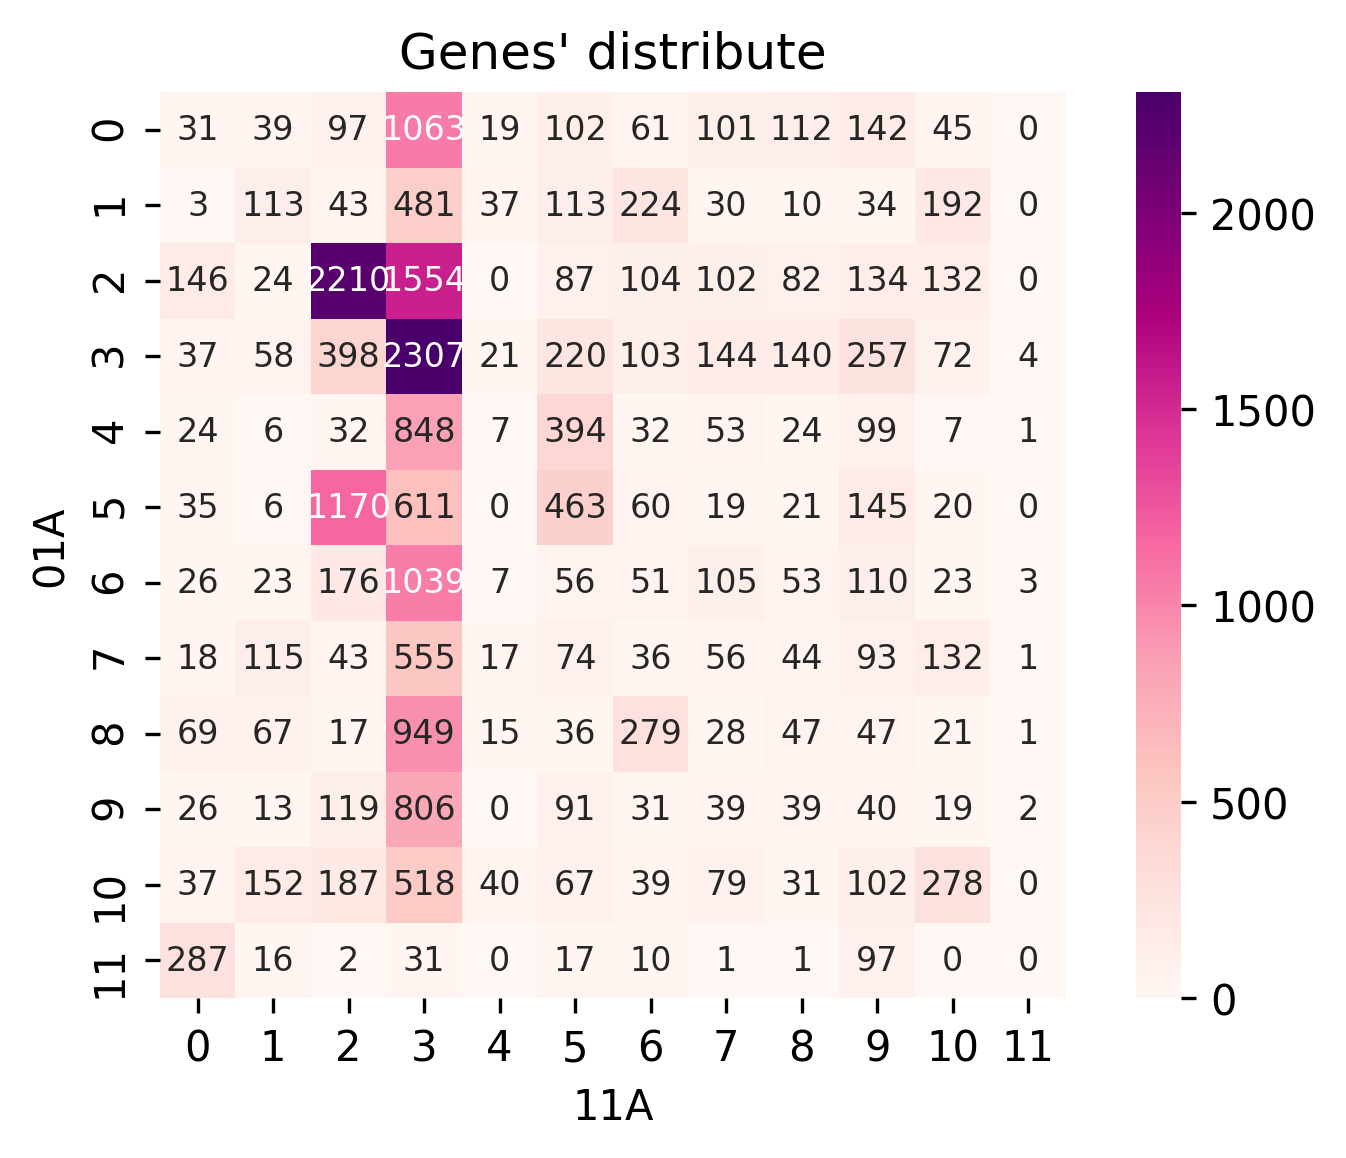

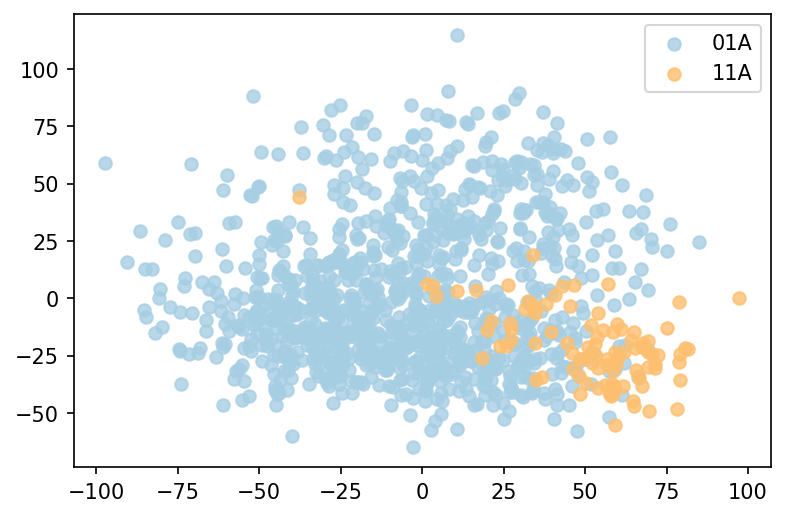

In [26]:
R.summary()

In [27]:
import dill as pickle
with open('./Result_file/BRCA_corr_diste12_121.pkl','wb') as f:
    pickle.dump(R,f)

## MEAN

In [236]:
pipeline = MATTE.AlignPipe()
# pipeline.funcs = pipeline.funcs[3:] # delete preprocessing steps.
pipeline.cluster_func[0].add_params(n_clusters=12)
pipeline

MATTE calculation pipeline
## STEP 0 	<PipeFunc> inputs_check()
## STEP 1 	<PipeFunc> RPKM2TPM()
## STEP 2 	<PipeFunc> log2transform()
## STEP 3 	<PipeFunc> expr_filter(gene_filter=None)
## STEP 4 	<PipeFunc> LocKernel_Transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)
## STEP 5 	PCA(n_components=16)
## CLUSTER STEP 0 	<PipeFunc> CrossCluster(preset='kmeans',n_clusters=12,method='a',dist_type='a',n_iters=20)
## CLUSTER STEP 1 	<PipeFunc> build_results()

In [238]:
R = pipeline.calculate(df[~df.index.duplicated()],df_pheno)
import dill as pickle
with open('./Result_file/BRCA_mean_dista12_121.pkl','wb') as f:
    pickle.dump(R,f)

Sat May 14 13:09:32 2022	 Running function <PipeFunc> inputs_check()
Sat May 14 13:09:32 2022	 Running function <PipeFunc> RPKM2TPM()
Sat May 14 13:10:09 2022	 Running function <PipeFunc> log2transform()
Sat May 14 13:10:10 2022	 Running function <PipeFunc> expr_filter(gene_filter=None)
Sat May 14 13:10:10 2022	 Running function <PipeFunc> LocKernel_Transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)
Sat May 14 13:10:10 2022	 Calculating the kernel matrix using mean
Sat May 14 13:13:17 2022	 Tranforming using model PCA(n_components=16)
Sat May 14 13:14:21 2022	 Running function <PipeFunc> CrossCluster(preset='kmeans',n_clusters=12,method='a',dist_type='a',n_iters=20)
Sat May 14 13:14:35 2022	 Running function <PipeFunc> build_results()
Sat May 14 13:14:35 2022	 building cluster results


### n_clusters finding

In [7]:
tmpt = pipeline._AlignPipe__cal_temp(df_exp=df,df_pheno=df_pheno)

Wed May 11 12:09:45 2022	 Running function <PipeFunc> expr_filter(gene_filter=None)
Wed May 11 12:09:45 2022	 Running function <PipeFunc> Kernel_Transform(kernel_type='mean',centering_kernel=True,outer_subtract_absolute=True,double_centering=True)
Wed May 11 12:09:45 2022	 Calculating the kernel matrix using mean
Wed May 11 12:27:59 2022	 Tranforming using model PCA(n_components=16)


In [8]:
# search best cluster
from tqdm import tqdm
res = {}
for n in tqdm([4,6,8,10,12,14,18,24]):
    tmpt['cluster_properties'] = {}
    pipeline.cluster_func[0].add_params(n_clusters=n)
    res[n] = pipeline.calculate_from_temp(tmpt_result=tmpt,verbose=False)
    print(res[n].cluster_properties['score'])


  0%|          | 0/8 [00:00<?, ?it/s]

Wed May 11 12:33:16 2022	 building cluster results



 12%|█▎        | 1/8 [00:38<04:31, 38.78s/it]

6831.097008110648
Wed May 11 12:33:54 2022	 building cluster results



 25%|██▌       | 2/8 [01:18<03:57, 39.51s/it]

39664.54786771056
Wed May 11 12:34:38 2022	 building cluster results



 38%|███▊      | 3/8 [02:05<03:33, 42.68s/it]

68550.43805326372
Wed May 11 12:35:32 2022	 building cluster results



 50%|█████     | 4/8 [03:02<03:14, 48.51s/it]

171577.74347710295
Wed May 11 12:37:43 2022	 building cluster results



 62%|██████▎   | 5/8 [05:17<03:58, 79.66s/it]

250193.47135814157
Wed May 11 12:39:46 2022	 building cluster results



 75%|███████▌  | 6/8 [07:27<03:13, 96.80s/it]

203937.4674397515
Wed May 11 12:43:22 2022	 building cluster results



 88%|████████▊ | 7/8 [11:12<02:18, 138.66s/it]

282184.93836434645


100%|██████████| 8/8 [17:37<00:00, 132.14s/it]

Wed May 11 12:49:23 2022	 building cluster results
343600.6160798848


# Analysis

## sample feature calculation
variables sf sfde sfdc

In [3]:
import dill as pickle
with open('./Result_file/BRCA_mean_dista12_121.pkl','rb') as f:
    Rde = pickle.load(f)
with open('./Result_file/BRCA_corr_diste12_121.pkl','rb') as f:
    Rdc = pickle.load(f)

In [4]:
sfde = Rde.SampleFeature()
sfdc = Rdc.SampleFeature(corr=True)

sf = pd.merge(
    sfde,
    sfdc,
    right_index=True,left_index=True
)

sfn = (sf-sf.mean())/sf.std() #normalize(sf,axis=0)
sf = pd.DataFrame(sfn,index=sf.index,columns=sf.columns)

In [ ]:
# Not used
from sklearn.preprocessing import normalize
plt.figure(dpi=300)

sns.heatmap(np.abs(sf),cmap=plt.cm.cividis)

from sklearn.manifold import TSNE
MATTE.analysis.Fig_SampleFeature(
    sfde,Rde.pheno,
    weighted_distcance=True,
    metric='correlation',
    model=TSNE())

from sklearn.manifold import TSNE
MATTE.analysis.Fig_SampleFeature(
    sfdc,Rdc.pheno,
    weighted_distcance=True,
    metric='correlation',
    model=TSNE())

decomper = TSNE(metric='correlation')
data = sf.loc[df_pheno[df_pheno=='01A'].index,:]
data = decomper.fit_transform(data)
plt.scatter(data[:,0],data[:,1])

## Sample clustering
variables labels

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
dist = sklearn.metrics.pairwise_distances(
    sf.loc[
        df_pheno[df_pheno=='01A'].index,
        (Rde.ModuleSNR(sf)>=0.5)
    ].values,metric='correlation')

cluster = AgglomerativeClustering(
    n_clusters=5,
    affinity='precomputed',linkage='complete',compute_distances=True
)
labels = cluster.fit_predict(
    dist
)
silhouette_score(dist,labels,metric='precomputed')

0.22325923606026776

In [ ]:
## Not Used : visulization of clustering 
from sklearn.manifold import spectral_embedding
data = spectral_embedding(2-dist,n_components=2)
#plt.scatter(data[:,0],data[:,1])

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Paired(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    if k != -1:
        xy = data[class_member_mask ]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k',
                 markersize=9,
                )
    else:
        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=3)
plt.show()

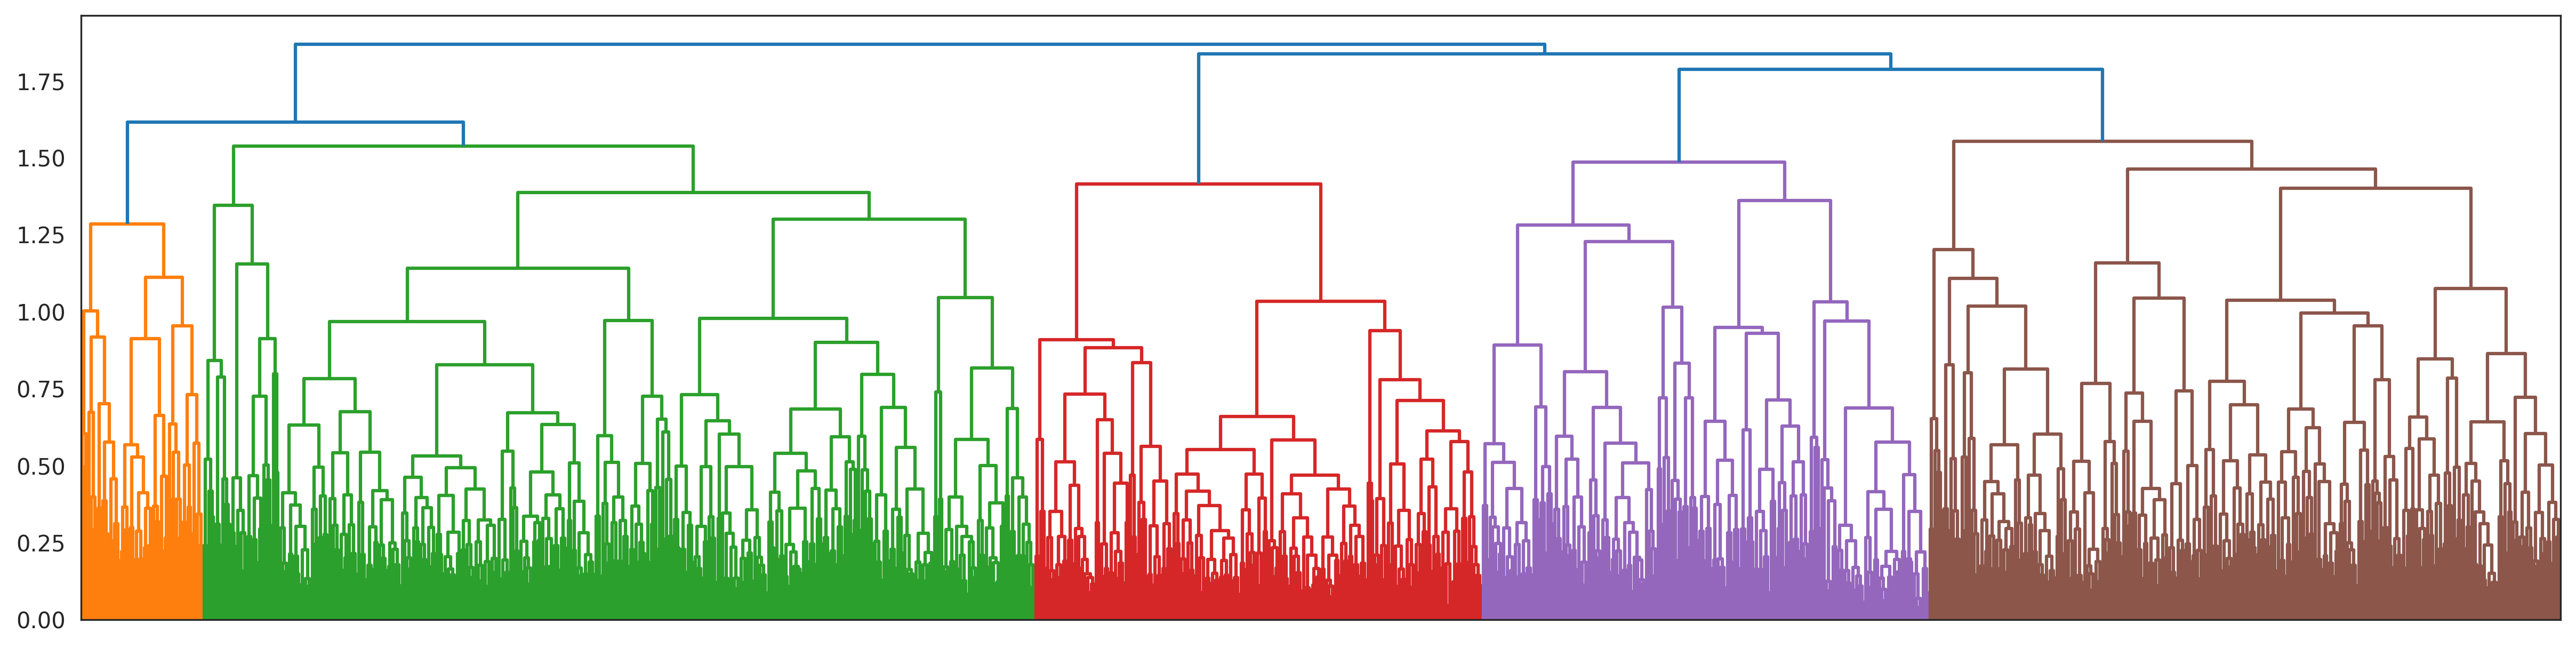

In [16]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

sns.set_style(style='white')
f = plt.figure(figsize=(20,5),dpi=300)
linkage_matrix = plot_dendrogram(model=cluster,color_threshold=1.6)
#_ = dendrogram(linkage_matrix,color_threshold=1)
plt.xticks([])
f.savefig('./Result_file/Subtypes_fig.pdf')

In [448]:
pd.Series(labels,index=df_pheno[df_pheno=='01A'].index).to_csv('./Result_file/Subtypes_label.csv')

## Overall Survival time analysis

In [58]:
import lifelines

dfos = pd.read_table('./TCGA-BRCA.survival.tsv',index_col=0)
dfos.drop(columns='_PATIENT',inplace=True)

In [60]:
from lifelines.statistics import multivariate_logrank_test as mlt
labels = pd.read_csv('./Result_file/Subtypes_label.csv',index_col=0).iloc[:,0]
test_sample= dfos.index.intersection(df_pheno[df_pheno=='01A'].index)
p = mlt(
    event_durations=dfos.loc[test_sample,'OS.time'],
    event_observed=dfos.loc[test_sample,'OS'],
    groups = pd.Series(labels,df_pheno[df_pheno=='01A'].index)[test_sample]
).p_value
p

0.005879145200547411

In [13]:
from lifelines import KaplanMeierFitter
def KMFFitPlot(df_coxreg, label,ax=None,fitter_args = {},**plotargs):
    """Plotting Survival Curve by Kaplan-Meier Fitter.

    Args:
        df_coxreg (pd.DataFrame): Used for the Fitter. ROWS: samples; COLUMNS: 'OS.time','OS' and genes.
        label (pd.Series): devided samples to 2 groups.
        fitter_args (dict, optional): kwargs for KaplanMeierFitter. Defaults to {}.
        **plotargs (optional): kwargs for plot. Defaults to {}.
    """
    if ax is None:
        ax = plt.gca()
    kmf = KaplanMeierFitter(**fitter_args)
    for i,l in enumerate(label.unique()):
        ix = (label == l)
        kmf.fit(df_coxreg['OS.time'][ix], df_coxreg['OS'][ix], label=f"G{l}")
        kmf.plot(ax=ax,**plotargs)
    return ax

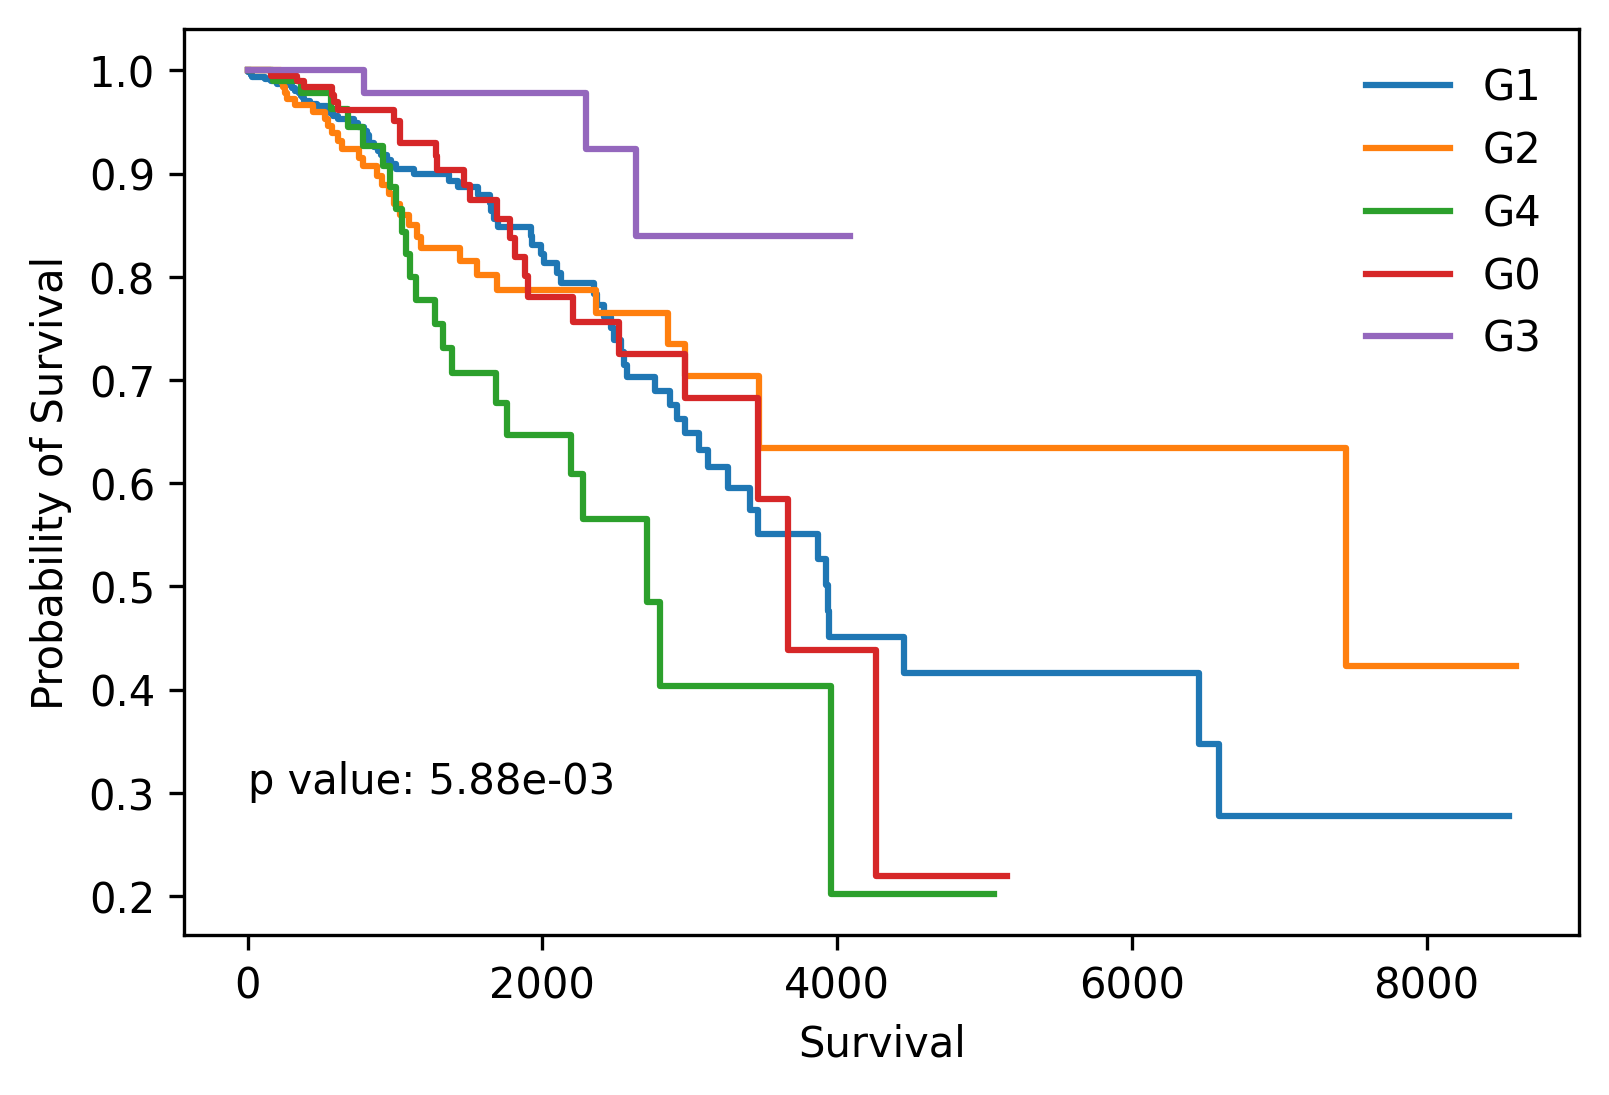

In [18]:
fig,ax = plt.subplots(dpi=300)
KMFFitPlot(
    dfos.loc[test_sample,:],
    pd.Series(labels,df_pheno[df_pheno=='01A'].index)[test_sample],
    ax=ax,
    ci_show=False,
    #show_censors=True,
    #legend=False
)
ax.text(
    x=0.1,y=0.3,s=f'p value: {p:.2e}'
)
ax.set_xlabel('Survival')
ax.set_ylabel('Probability of Survival')
ax.legend(edgecolor='white')

In [19]:
fig.savefig('./Result_file/Subtype_OS.pdf',bbox_inches='tight')

## Cross Compare of other subtypes

In [29]:
labels = pd.read_csv('./Result_file/Subtypes_label.csv',index_col=0)
reflabels = pd.read_csv('./BRCA_subtype_ich_group.csv',index_col=0)
df_pheno = pd.read_table('./TCGA-BRCA.GDC_phenotype.tsv',index_col=0)

labels.index= [i[:-4] for i in labels.index]
df_pheno.index= [i[:-4] for i in df_pheno.index]
labels = labels.iloc[:,0]

In [30]:
reflabels['Group'] = labels
reflabels.dropna(inplace=True)
reflabels['Group'] = reflabels['Group'].astype(int)

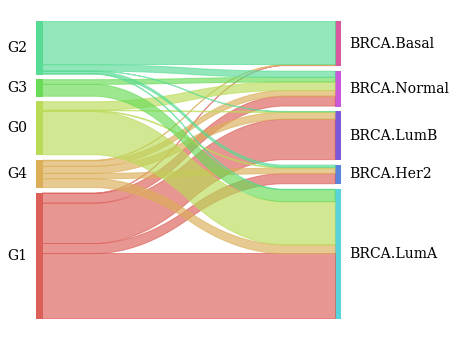

In [21]:
from pySankey.sankey import sankey
sankey('G'+reflabels['Group'].astype(str),reflabels['TCGA Subtype'])
f = plt.gcf()
f.savefig('./Result_file/Subtype_PAM50.pdf',bbox_inches='tight')

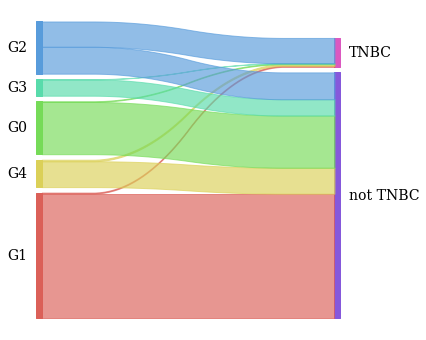

In [40]:
from pySankey.sankey import sankey
reflabels['TNBC'] = [['not TNBC','TNBC'][i] for i in (reflabels[['er_status_by_ihc','pr_status_by_ihc','her2_status_by_ihc']]=='Negative').all(axis=1)]
sankey('G'+reflabels['Group'].astype(str),reflabels['TNBC'])
f = plt.gcf()
f.savefig('./Result_file/Subtype_TNBC.pdf',bbox_inches='tight')

In [91]:
from sklearn.metrics import adjusted_rand_score as ari
for ref in reflabels.columns:
    dfref = reflabels[ref].dropna()
    print(
        ref,
        ari(dfref,labels[dfref.index])
    )
for ref in df_pheno.columns[df_pheno.dtypes!=np.float64]:
    dfref = df_pheno.loc[labels.index,ref].dropna()
    print(
        ref,
        ari(dfref,labels[dfref.index])
    )

Immune Subtype 0.05621292584470309
TCGA Subtype 0.22451671121574346
er_status_by_ihc 0.20418900143498017
pr_status_by_ihc 0.15668762458267088
her2_status_by_ihc -0.01795206080545947
Group 1.0
additional_pharmaceutical_therapy 0.030440432672980376
additional_radiation_therapy -0.009007298081879596
additional_surgery_locoregional_procedure 0.02387768776268502
additional_surgery_metastatic_procedure 0.0
axillary_lymph_node_stage_method_type 0.015523500645667413
axillary_lymph_node_stage_other_method_descriptive_text 0.04938271604938271
batch_number 0.012059285852772814
bcr 0.0
bcr_followup_barcode 0.0011006071416305278
bcr_followup_uuid 0.0011006071416305278
submitter_id 0.0011737869783253058
breast_cancer_surgery_margin_status 0.009139916026162096
breast_carcinoma_immunohistochemistry_er_pos_finding_scale 0.013780855008188216
breast_carcinoma_immunohistochemistry_progesterone_receptor_pos_finding_scale 0.011745768094275062
breast_carcinoma_primary_surgical_procedure_name -0.0040225261464

## Specific Modules of Subtypes

In [3]:
## Data read in
import dill as pickle
with open('./Result_file/BRCA_mean_dista12_121.pkl','rb') as f:
    Rde = pickle.load(f)
with open('./Result_file/BRCA_corr_diste12_121.pkl','rb') as f:
    Rdc = pickle.load(f)

labels = "G"+pd.read_csv('./Result_file/Subtypes_label.csv',index_col=0).iloc[:,0].astype(str)

sfde = Rde.SampleFeature()
sfdc = Rdc.SampleFeature(corr=True)
sfde.columns = [i[:-1]+'x' for i in sfde.columns]
sfdc.columns = [i[:-1]+'y' for i in sfdc.columns]

sf = pd.merge(
    sfde,
    sfdc,
    right_index=True,left_index=True
)

sfn = (sf-sf.mean())/sf.std() #normalize(sf,axis=0)
sf = pd.DataFrame(sfn,index=sf.index,columns=sf.columns)
can_nor_snr = Rde.ModuleSNR(sf)

In [4]:
from itertools import combinations
def SNR(x,y):
    return np.abs(x.mean() - y.mean())/(x.std()+y.std())

def multi_SNR(data,label):
    ret = pd.DataFrame()
    for l in label.unique():
        ret[l] = SNR(data.loc[label==l,:],data.loc[label!=l,:])
    return ret

def cal_corr_value(sf,):
    corrinsample = lambda x,y: (x-x.mean())*(y-y.mean())/(x.std()*y.std())
    ret = pd.DataFrame()
    for i,j in combinations(sf.columns,2):
        ret[f"{i}~{j}"] = corrinsample(sf.loc[:,i],sf.loc[:,j])
    return ret

In [5]:
corrsf = cal_corr_value(sf.loc[labels.index,can_nor_snr[can_nor_snr>=0.5].index])

In [6]:
subtype_sigmodule = multi_SNR(corrsf,labels)

In [7]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=8)
idx_order = cluster.fit_predict(subtype_sigmodule)

<AxesSubplot:>

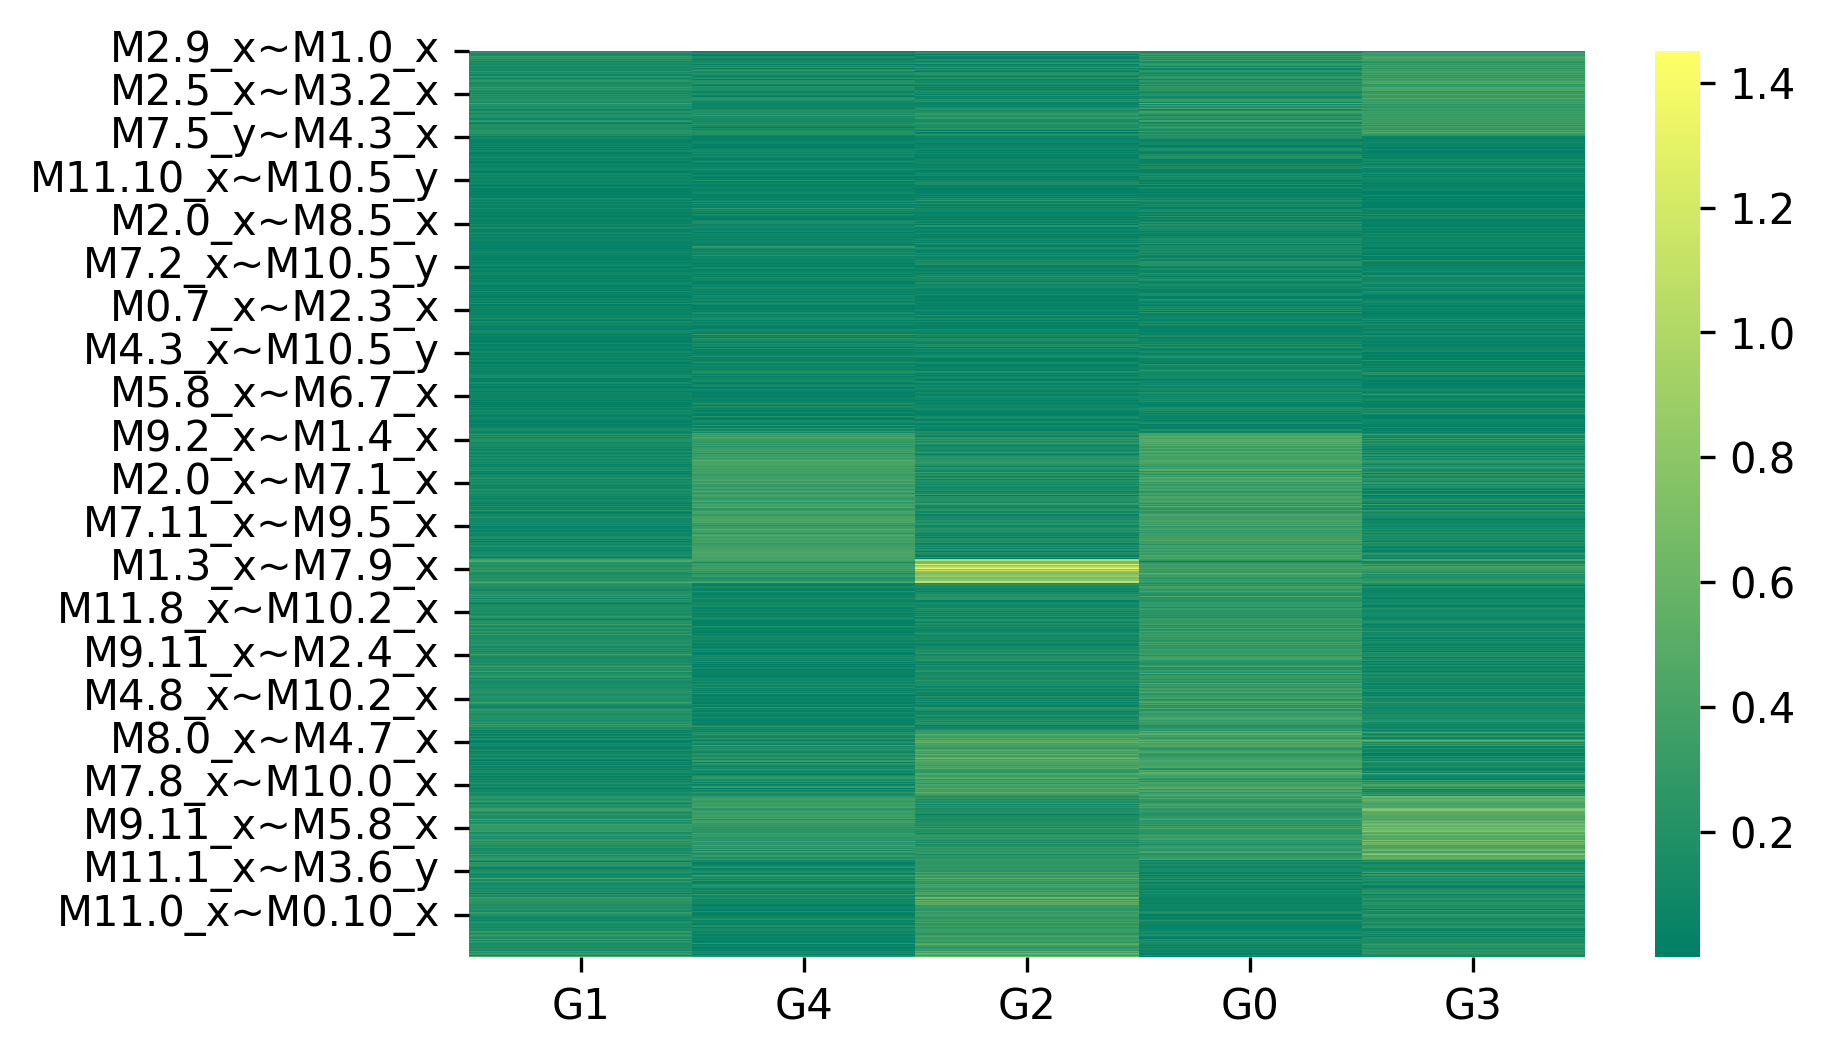

In [8]:
idx_order = pd.Series(idx_order,index=subtype_sigmodule.index).sort_values()
#idx_order = idx_order[idx_order!=1]
plt.figure(dpi=300)
sns.heatmap(
    subtype_sigmodule.loc[idx_order.index,:],
    cmap='summer'
)

<AxesSubplot:>

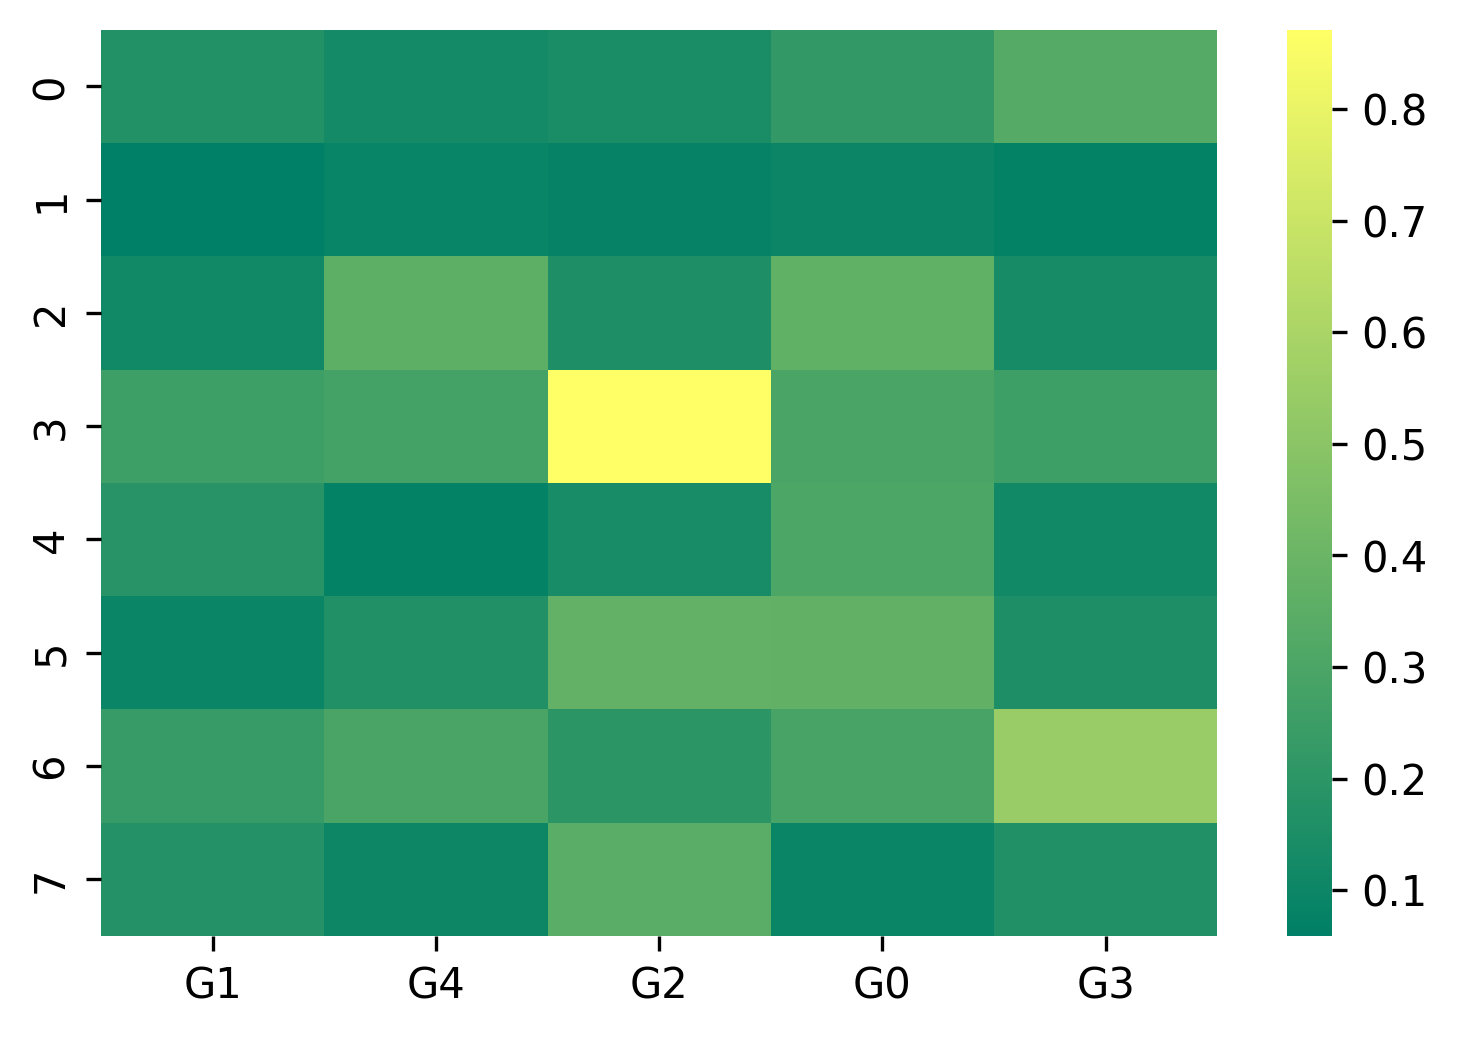

In [9]:
plt.figure(dpi=300)
sns.heatmap(
    subtype_sigmodule.groupby(by=idx_order).apply(lambda x:x.mean()),
    cmap='summer'
)

In [18]:
target_cluster_id = 3
data = sf.loc[labels.index,can_nor_snr[can_nor_snr>=0.5].index]

corr = data[labels=='G2'].corr()
links1 = pd.DataFrame(columns = ['var1','var2','value'])
for l in idx_order[idx_order==target_cluster_id].index:
    a,b = l.split('~')
    links1.loc[l,:] = a,b,corr.loc[a,b] 

corr = data[labels!='G2'].corr()
links2 = pd.DataFrame(columns = ['var1','var2','value'])
for l in idx_order[idx_order==target_cluster_id].index:
    a,b = l.split('~')
    links2.loc[l,:] = a,b,corr.loc[a,b] 

links = links1.copy()
links['value'] = np.abs(links1['value'] - links2['value'])
links = links.sort_values(by='value',ascending=False).iloc[0:30]

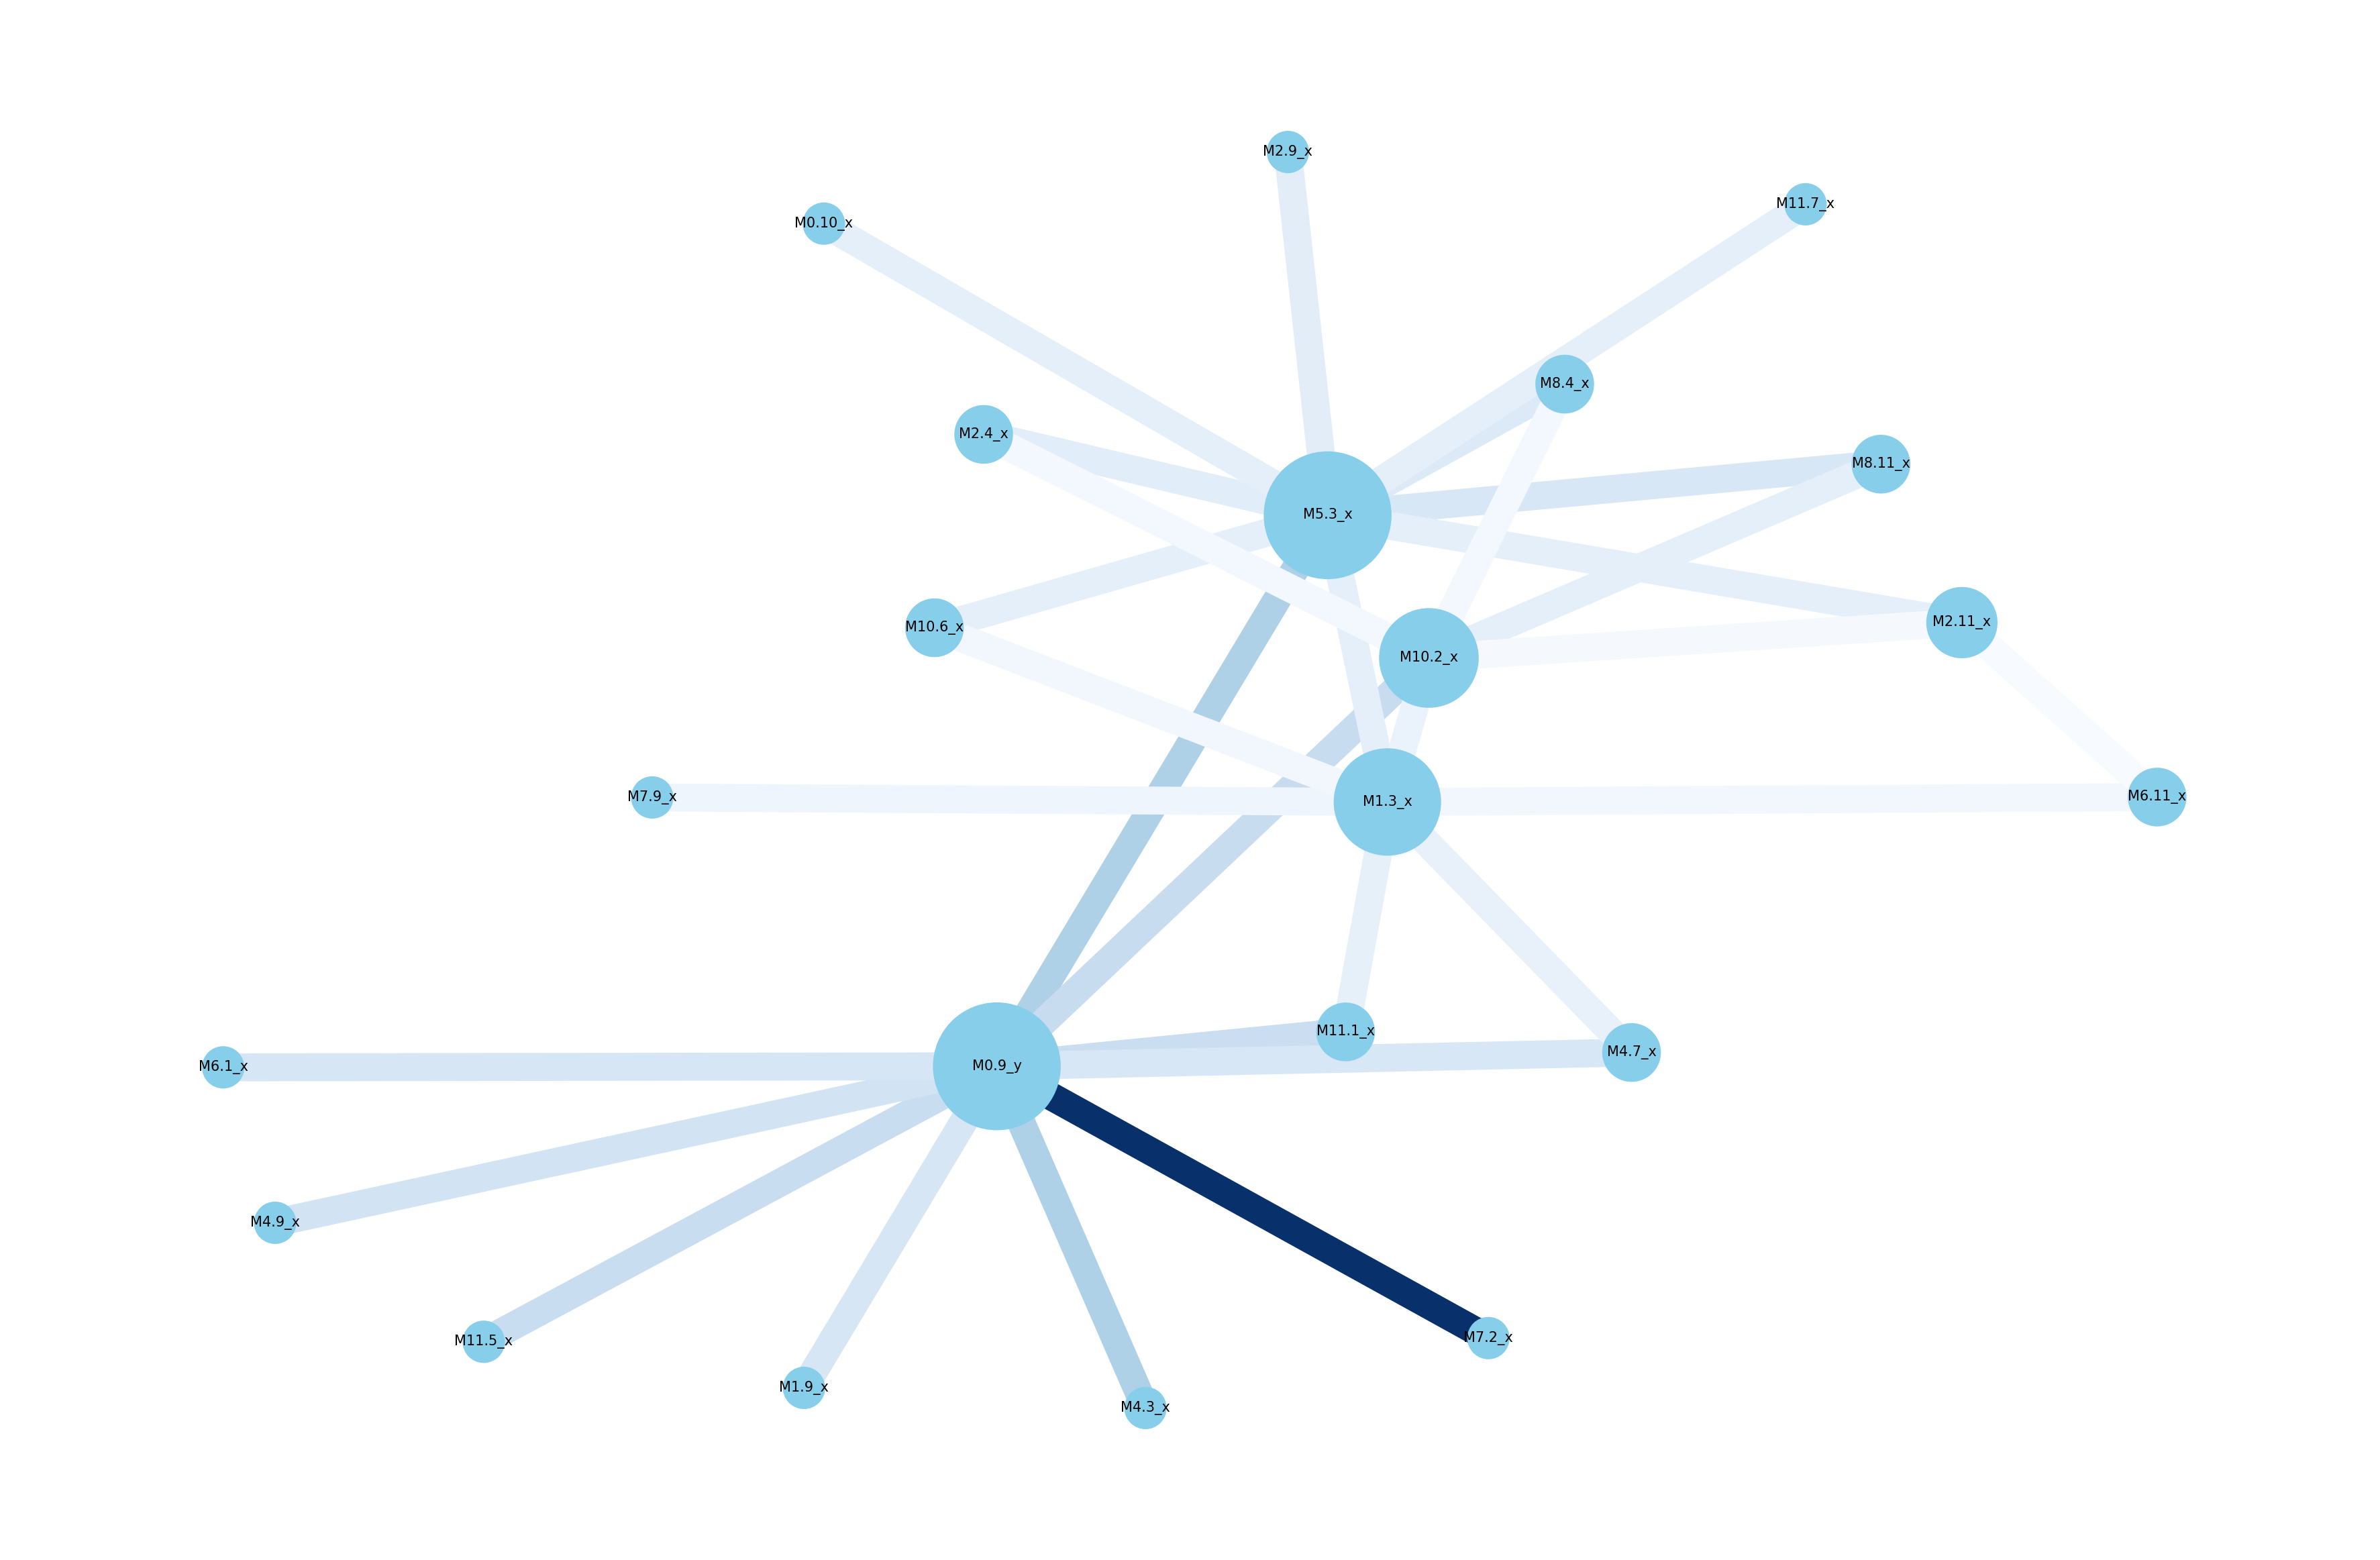

In [43]:
import networkx as nx
G=nx.from_pandas_edgelist(links, 'var1', 'var2',edge_attr='value')
Gpos = nx.spring_layout(G)
fig,ax = plt.subplots(dpi=300,figsize=(15,10))
nx.draw(G,ax=ax,pos=Gpos,
        with_labels=True, font_size=5,
        node_color='skyblue', node_size=200*np.array([j for i,j in list(G.degree)]), 
        edge_color=(1+links['value'])/2,edge_cmap=plt.cm.Blues,width=10.0,
       )
fig.savefig('./Result_file/G2DiffCoreNet.pdf',bbox_inches='tight')
# links.to_csv('./Result_file/G2CoreNetLinks.csv')

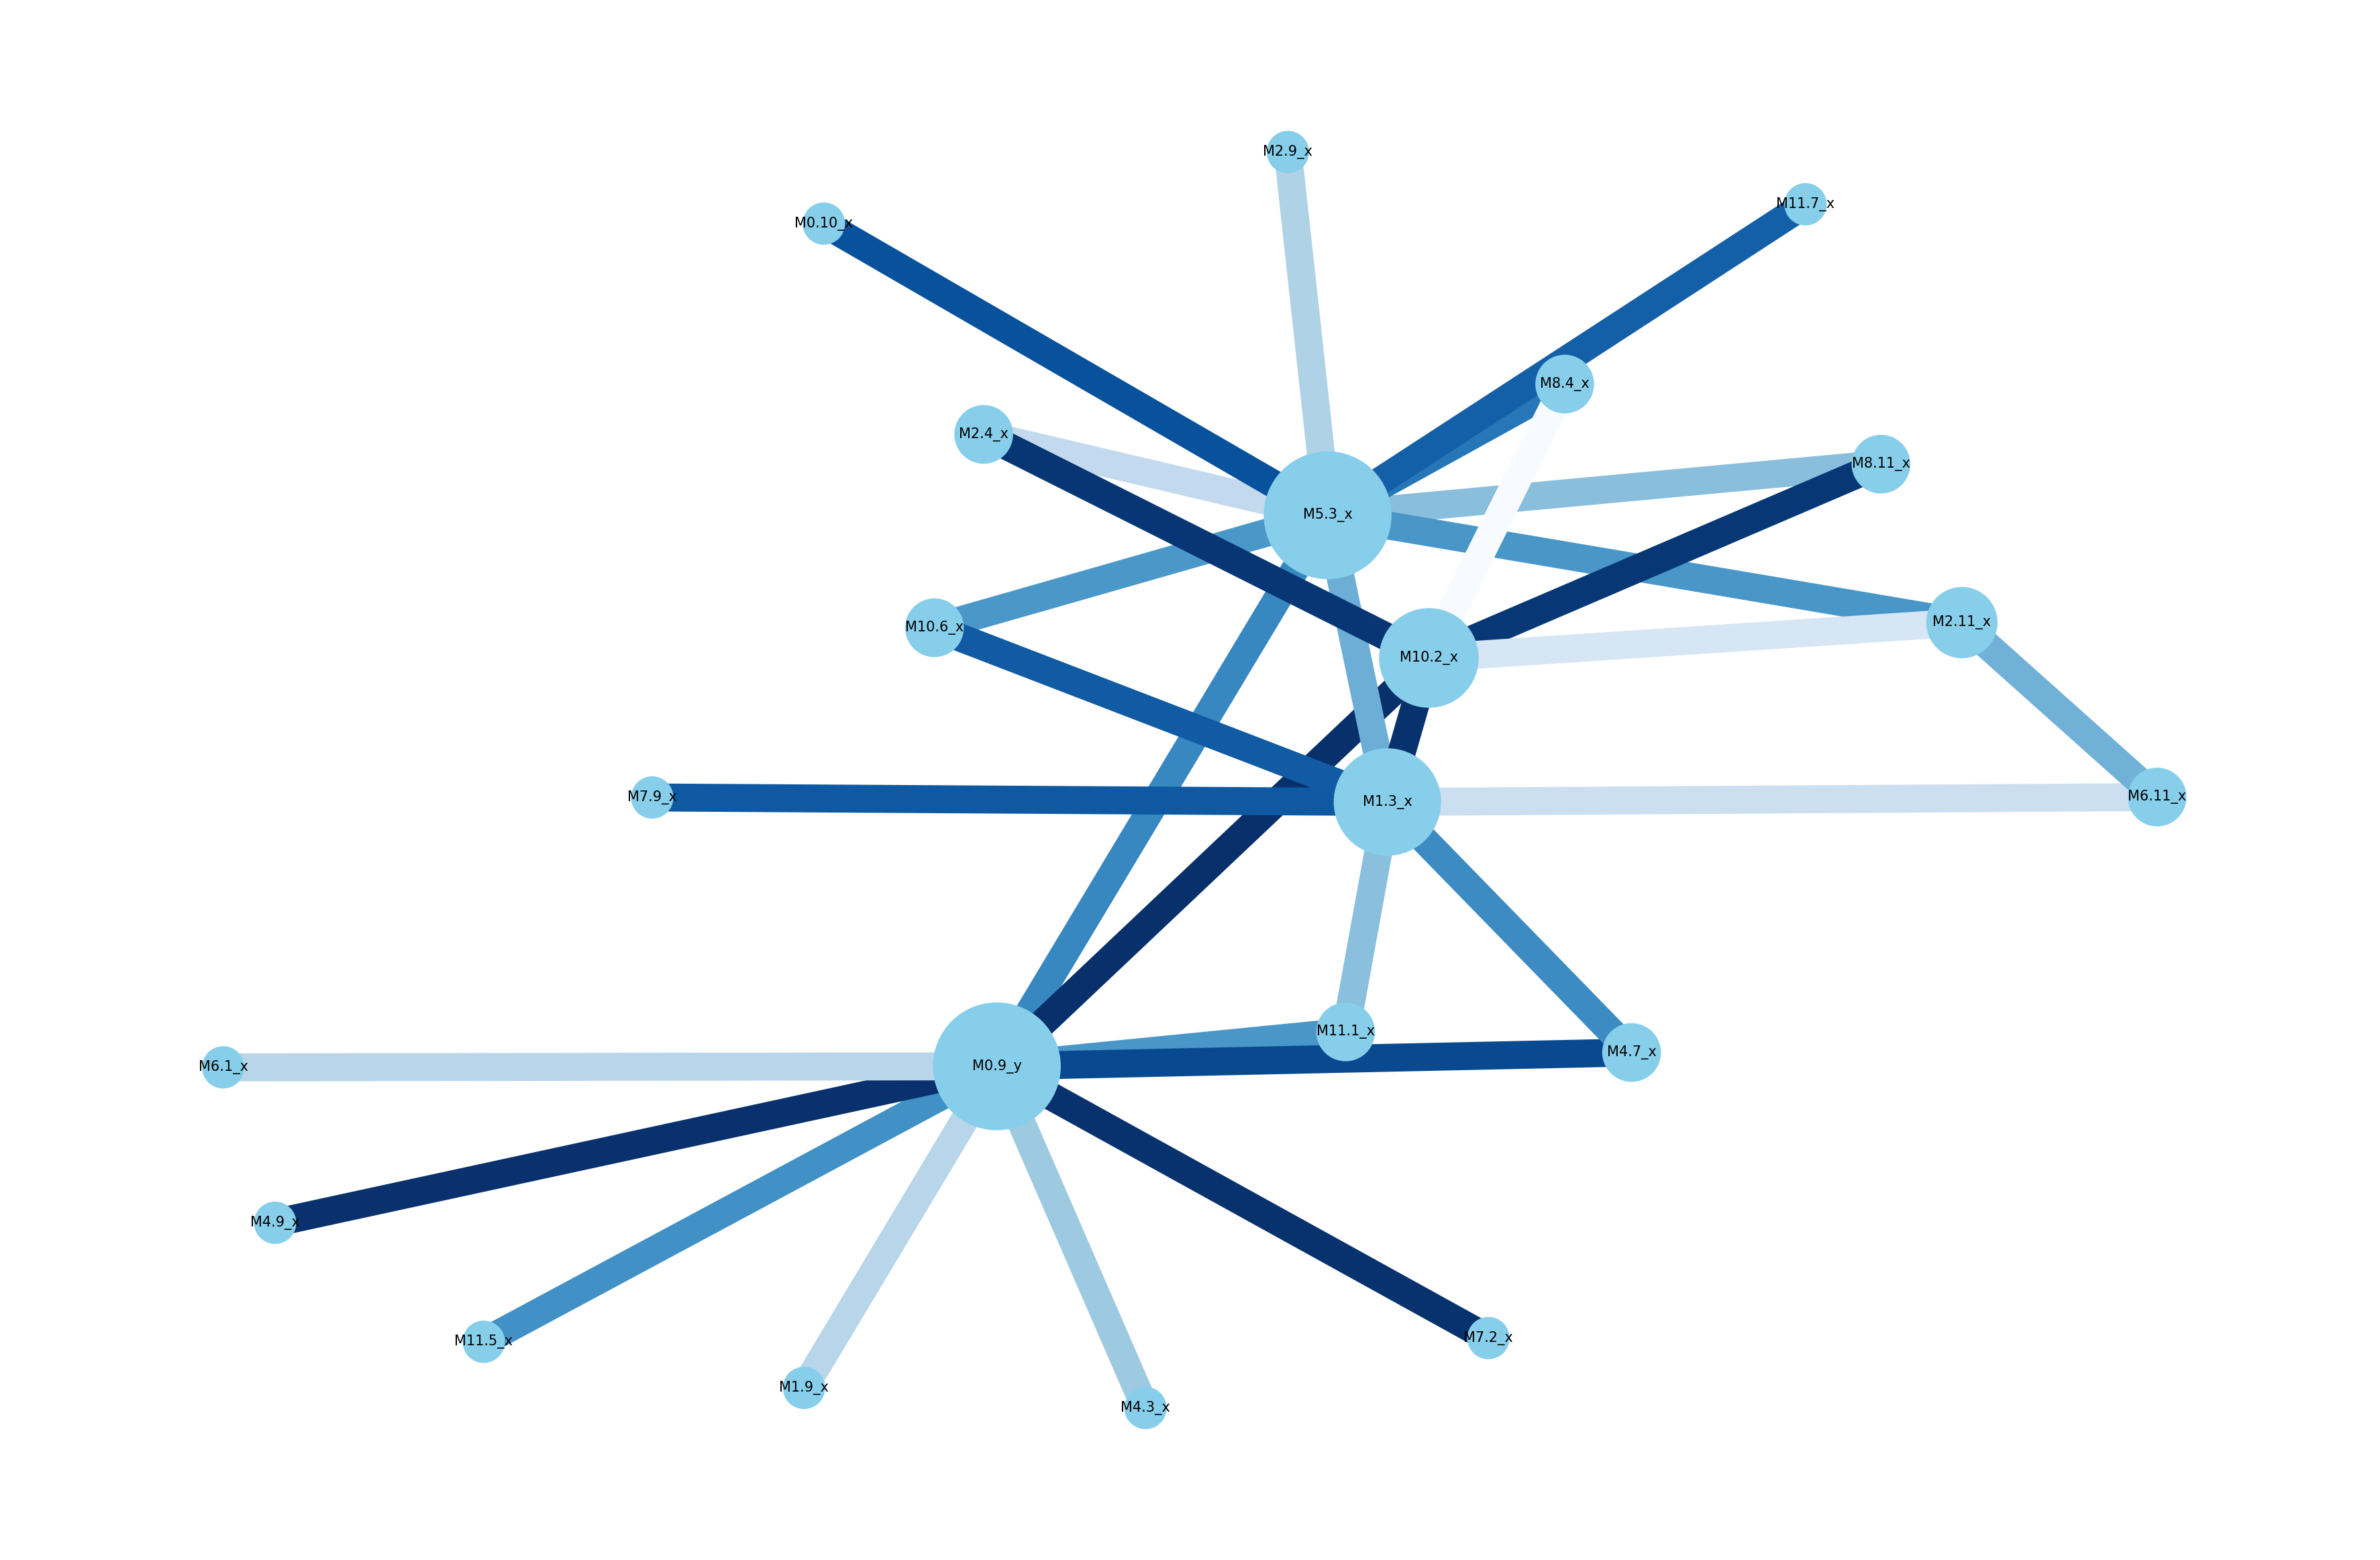

In [44]:
fig,ax = plt.subplots(dpi=300,figsize=(15,10))
G1 = nx.from_pandas_edgelist(links1.loc[links.index,:],'var1','var2')
nx.draw(
    G1,pos=Gpos,ax=ax,
    with_labels=True,font_size=5,
    node_color='skyblue', node_size=200*np.array([j for i,j in list(G1.degree)]),
    edge_color=(1+links1.loc[links.index,'value'].astype(float))/2,edge_cmap=plt.cm.Blues,width=10.
)
fig.savefig('./Result_file/G2CoreNet.pdf',bbox_inches='tight')

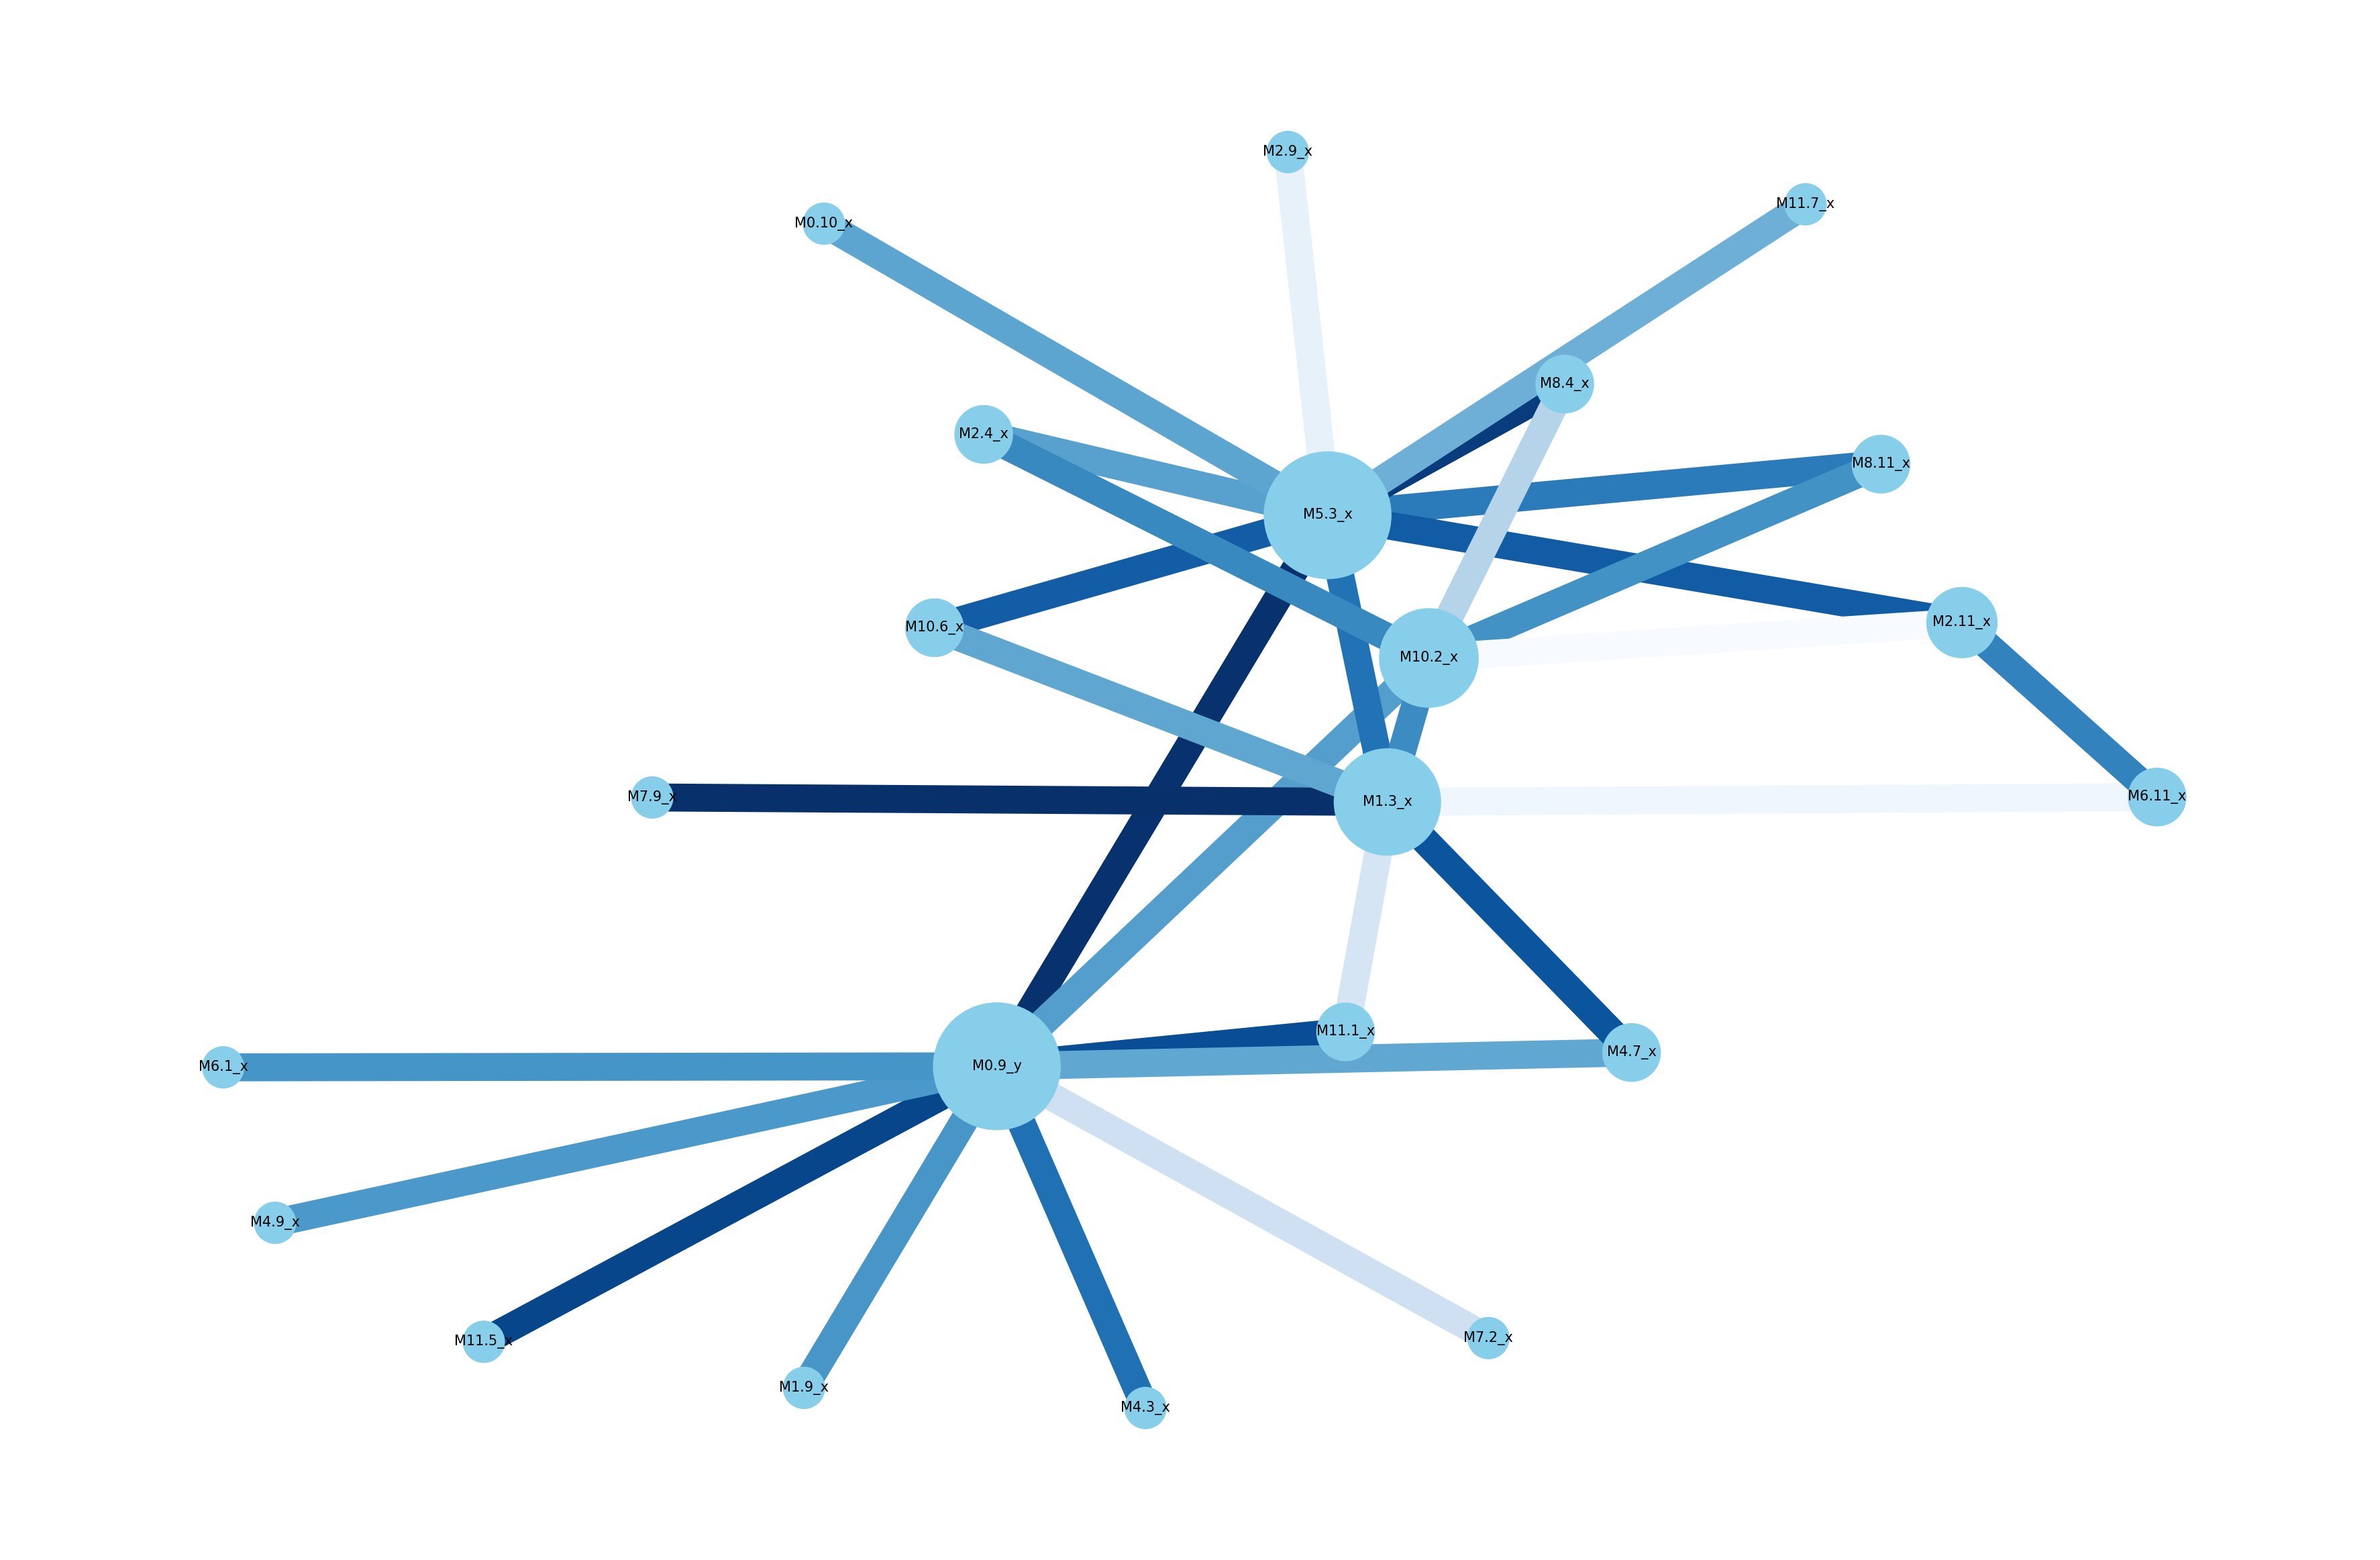

In [46]:
fig,ax = plt.subplots(dpi=300,figsize=(15,10))
G2 = nx.from_pandas_edgelist(links2.loc[links.index,:],'var1','var2')
nx.draw(
    G2,pos=Gpos,ax=ax,
    with_labels=True,font_size=5,
    node_color='skyblue', node_size=200*np.array([j for i,j in list(G2.degree)]),
    edge_color=(1+links2.loc[links.index,'value'].astype(float))/2,edge_cmap=plt.cm.Blues,width=10.
)
fig.savefig('./Result_file/GOthersCoreNet.pdf',bbox_inches='tight')

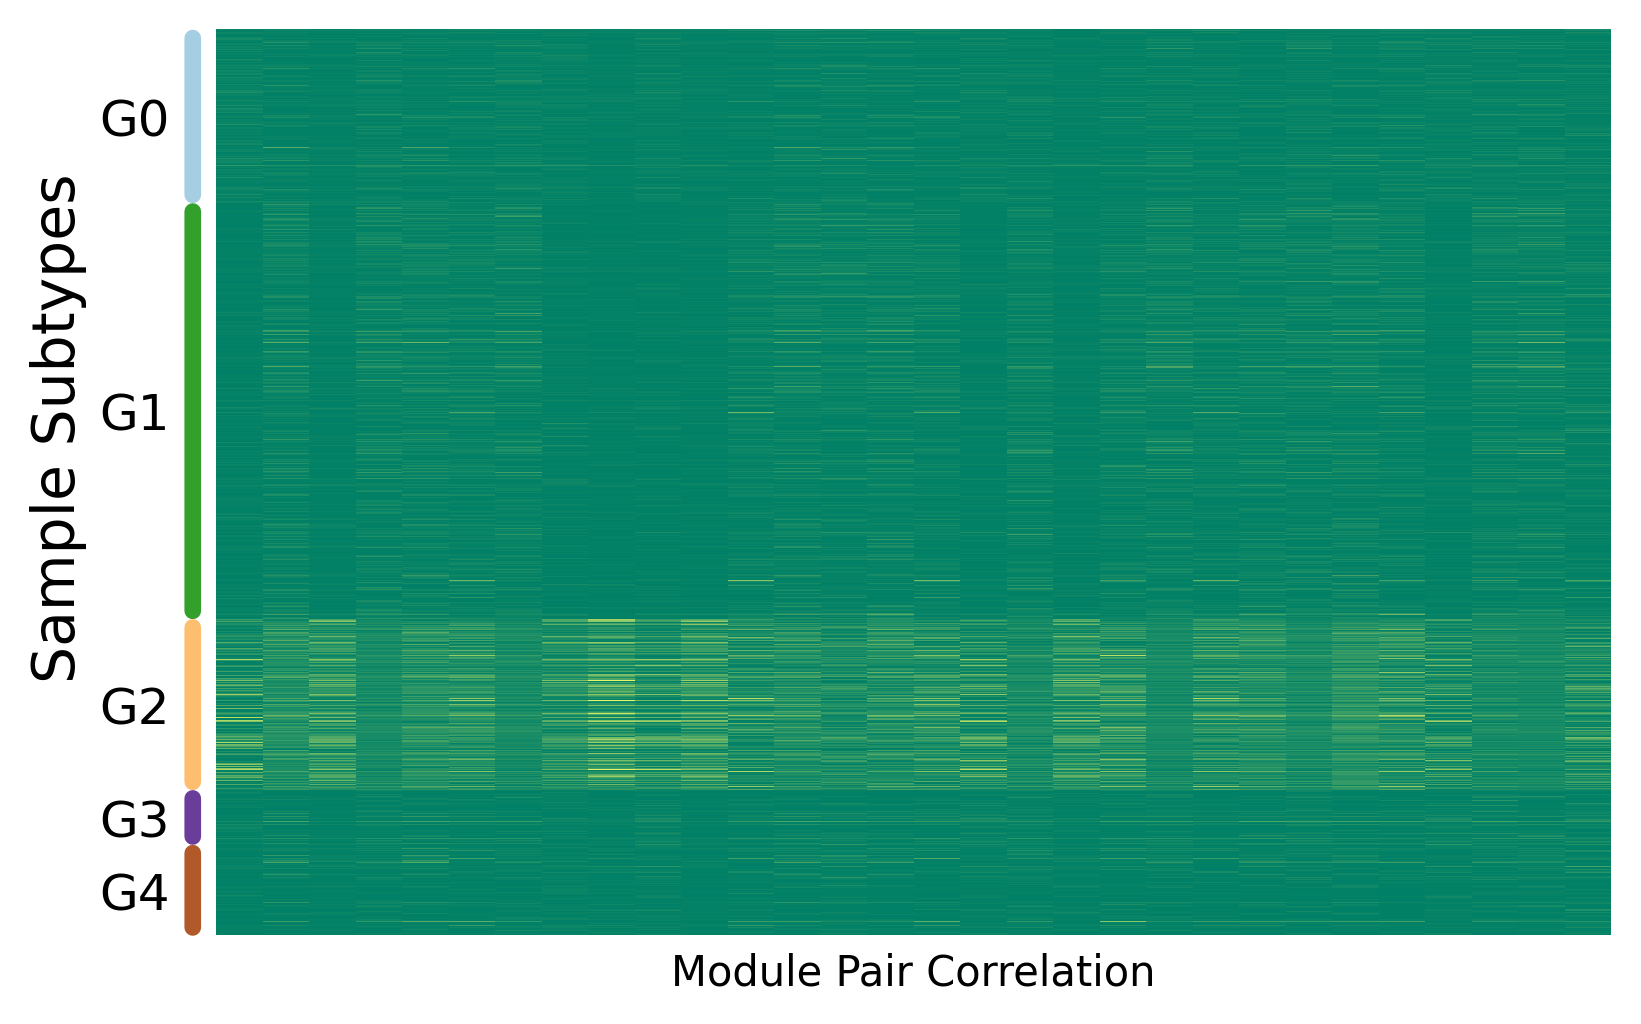

In [261]:
fig,heatax = plt.subplots(dpi=300)
sns.heatmap(
    np.abs(corrsf.loc[labels.sort_values().index,links.index]),
    cmap='summer',cbar=False,ax=heatax
)
_ = plt.xticks([])
_ = plt.yticks([])

nx = -0.5
ny = 0
for i,l in enumerate([f"G{k}" for k in range(5)]):
    n = labels.value_counts()[l]
    
    an = heatax.annotate(
        '', (nx, ny+0.5), (nx, ny+n+0.5),
        xycoords='data',
        horizontalalignment='left', 
        verticalalignment='top',
        annotation_clip=False,
        arrowprops=dict(arrowstyle='-', color=plt.cm.Paired(i/4),lw=4,
        )
    )

    an_text = heatax.annotate(
        l, (nx-2, ny+n/2+35),
        xycoords='data',
        horizontalalignment='left',
        verticalalignment='bottom',
        fontsize=12,
        annotation_clip=False,)
    ny += n
heatax.set_xlabel('Module Pair Correlation')
heatax.annotate(
        "Sample Subtypes", (nx-3.5, ny-300),
        xycoords='data',
        horizontalalignment='left',
        verticalalignment='bottom',
        fontsize=14,rotation=90,
        annotation_clip=False,)
fig.savefig('./Result_file/G2SpecificCoreCorrelation.pdf',bbox_inches='tight')

# Function Analysis

In [2]:
import dill as pickle
with open('./Result_file/BRCA_mean_dista12_121.pkl','rb') as f:
    Rde = pickle.load(f)
with open('./Result_file/BRCA_corr_diste12_121.pkl','rb') as f:
    Rdc = pickle.load(f)

links = pd.read_csv('./Result_file/G2CoreNetLinks.csv',index_col=0)

interested_modules = set(links['var1'].values.tolist() + links['var2'].values.tolist())
mgsxy = {}
for m in sorted(interested_modules):
    if 'x' in m:
        mgsxy[m] = Rde.module_genes[m.split('_')[0]]
    elif 'y' in m:
        mgsxy[m] = Rdc.module_genes[m.split('_')[0]]
    else:
        print(m);raise

PAM50 = "ACTR3B ANLN BAG1 BCL2 BIRC5 BLVRA CCNB1 CCNE1 CDC20 CDC6 CDCA1 CDH3 CENPF CEP55 CXXC5 EGFR ERBB2 ESR1 EXO1 FGFR4 FOXA1 FOXC1 GPR160 GRB7 KIF2C KNTC2 KRT14 KRT17 KRT5 MAPT MDM2 MELK MIA MKI67 MLPH MMP11 MYBL2 MYC NAT1 ORC6L PGR PHGDH PTTG1 RRM2 SFRP1 SLC39A6 TMEM45B TYMS UBE2C UBE2T"
PAM50 = PAM50.split()

## 12 genes overlap with PAM50 in G2 Core Module
set([idmap[j] for i in mgsxy.values() for j in i]) & set(PAM50) 

In [ ]:
import gseapy as gp
from tqdm import tqdm

defined_genesets = gp.parser.gsea_gmt_parser('./LocGOKEGG_merged.gmt')
with open('./idmap.pkl','rb') as f:
    idmap = pickle.load(f)

In [69]:
def enrichr(module_genes:dict):
    enriched = {}
    module_genes = {k:pd.Series(v) for k,v in module_genes.items()}
    for module,genes in tqdm(module_genes.items()):
        transfer_genes = [idmap[i] for i in genes[genes.isin(pd.Series(idmap.keys()))]]
        enr_res = gp.enrichr(
            gene_list=transfer_genes, 
            gene_sets=defined_genesets,
            outdir=None,verbose=False)
        res = enr_res.res2d
        if res is not None:
            res['module'] = module
            enriched[module] = res
    if len(enriched) > 1:
        enriched_all = pd.concat([i for i in enriched.values()])
        enriched_all = enriched_all.set_index('Gene_set')
    
        return enriched_all
    else:
        return res

In [16]:
enrich_res = enrichr(mgsxy)

100%|██████████| 23/23 [00:54<00:00,  2.35s/it]


In [73]:
enrich_mer = enrichr({"G2Core":[j for i in mgsxy.values() for j in i]})
enrich_mer

100%|██████████| 1/1 [00:15<00:00, 15.42s/it]


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,module
0,CUSTOM140625963068928,'de novo' posttranslational protein folding (G...,5/31,0.311746,0.793824,1.457429,UGGT1;HSPA13;SDF2L1;BAG1;HSPA6,G2Core
1,CUSTOM140625963068928,1-acylglycerol-3-phosphate O-acyltransferase a...,2/13,0.473111,0.875081,1.545186,GPAT4;LPCAT1,G2Core
2,CUSTOM140625963068928,1-acylglycerophosphocholine O-acyltransferase ...,2/6,0.155275,0.600214,3.210413,MBOAT2;LPCAT1,G2Core
3,CUSTOM140625963068928,1-alkyl-2-acetylglycerophosphocholine esterase...,1/7,0.590887,0.896285,1.668595,PAFAH1B3,G2Core
4,CUSTOM140625963068928,1-phosphatidylinositol-3-kinase activity (GO:0...,1/10,0.721103,0.924645,1.191666,PIK3R3,G2Core
...,...,...,...,...,...,...,...,...
6748,CUSTOM140625963068928,zygotic determination of anterior/posterior ax...,1/5,0.471846,0.875081,2.275596,BASP1,G2Core
6749,CUSTOM140625963068928,zymogen activation (GO:0031638),8/45,0.164536,0.612339,1.560254,CYFIP2;PGK1;MMP14;BAD;CASP8;F12;FADD;PLAU,G2Core
6750,CUSTOM140625963068928,zymogen granule (GO:0042588),1/6,0.535160,0.889694,1.925403,GP2,G2Core
6751,CUSTOM140625963068928,zymogen granule membrane (GO:0042589),1/6,0.535160,0.889694,1.925403,GP2,G2Core


In [42]:
enrich_res[(enrich_res['module'] == 'M7.2_x') & (enrich_res['P-value'] < 0.05)].to_csv('./tmpt/M72x_func.csv')

sigres = enrich_res[enrich_res['Adjusted P-value'] <=0.05]
module_annote = pd.DataFrame(sigres.groupby('module').apply(lambda x: x['Term']))
module_annote.to_csv('./Result_file/G2CoreNetFunction.csv')

enrich_mer[enrich_mer['Adjusted P-value']<=0.05].to_csv('./Result_file/G2CoreNetFunction_merged.csv')

In [88]:
def detect_cat(s):
    if 'GO' in s:
        return 'GO'
    elif 'chr' in s:
        return 'CHROMOSOME'
#     elif 'disease' in s.lower():
#         return 'DISEASE'
    else:#if 'pathway' in s.lower():
        return 'PATHWAY'
sigres['Category'] = [detect_cat(i) for i in sigres['Term']]
df_vis = sigres.groupby(by='Category').apply(lambda x: x.sort_values(by='Adjusted P-value').iloc[:10,:])

In [99]:
df_vis = enrich_mer[enrich_mer['Adjusted P-value']<=0.05]
df_vis['Category'] = [detect_cat(i) for i in df_vis['Term']]
df_vis = df_vis.groupby(by='Category').apply(lambda x: x.sort_values(by='Adjusted P-value').iloc[:10,:])

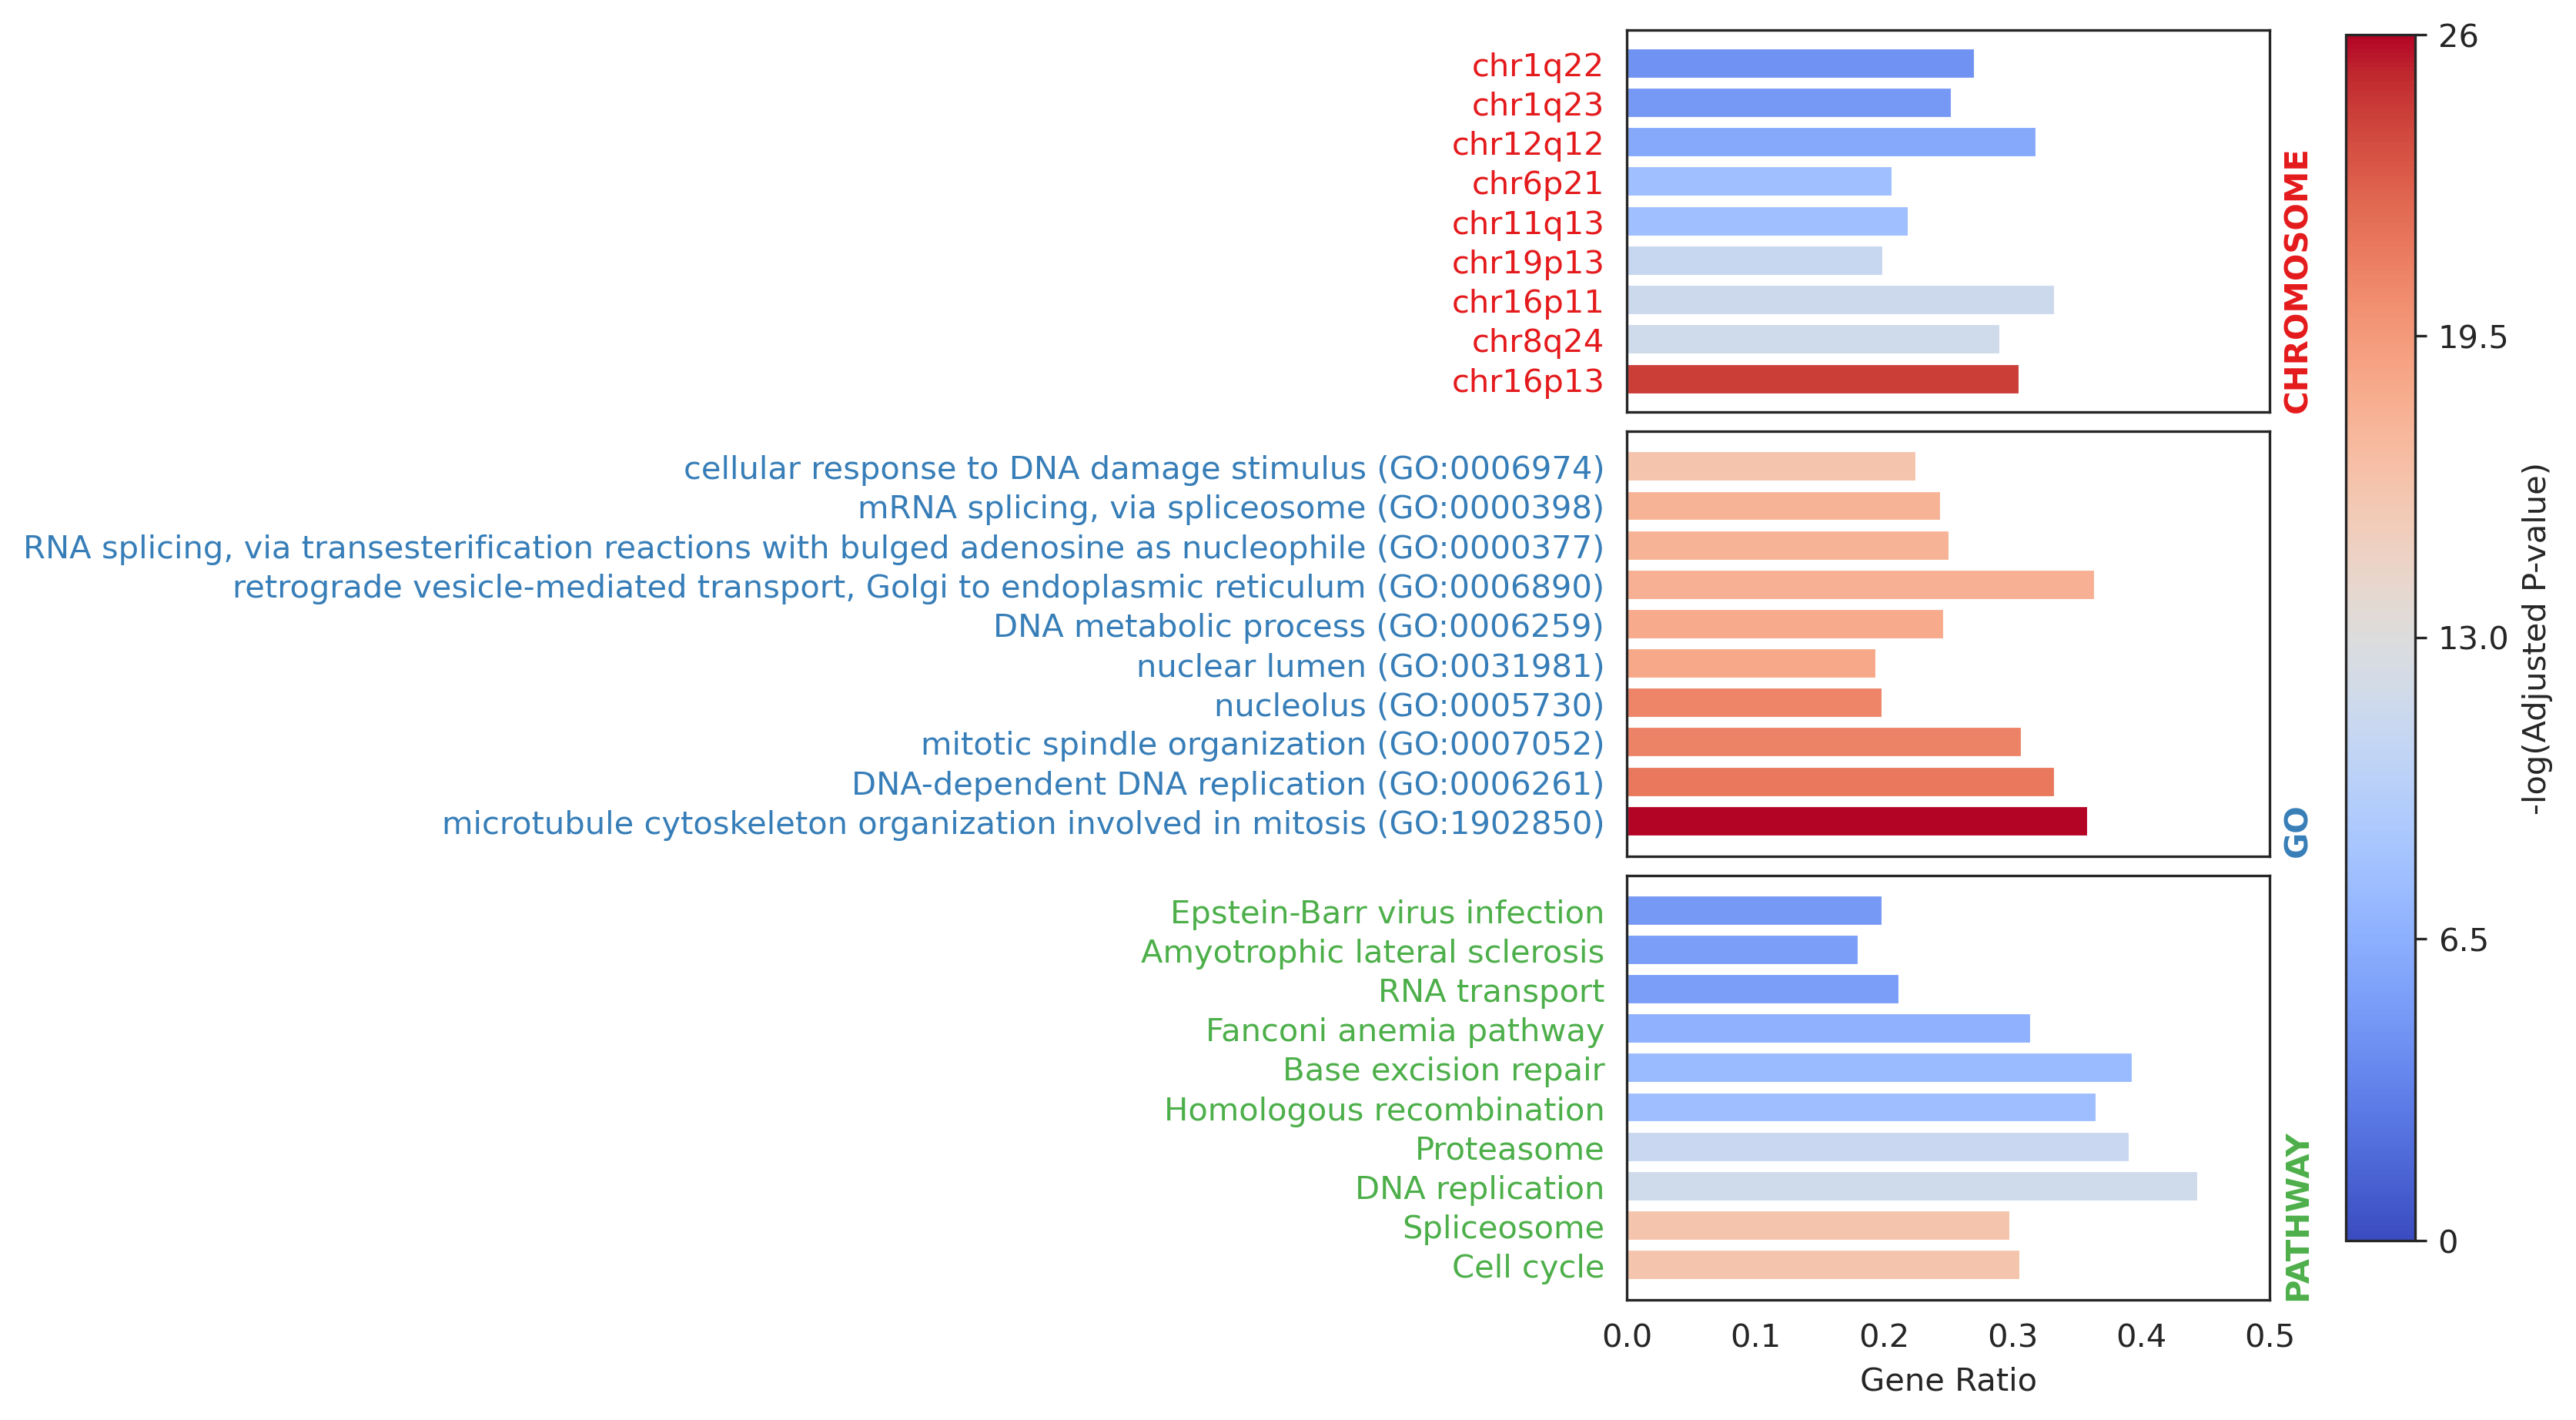

In [101]:
df_vis['gene_ratio'] = [eval(i) for i in df_vis['Overlap']]
sns.set_style(style='white')
f = MATTE.analysis.Fig_Fuction(df_vis.set_index('Term'),'Adjusted P-value',dpi=300,figsize=(10,6))
f.savefig('./Result_file/G2CoreNetFunction_merged_vis.pdf',bbox_inches='tight')